In [7]:
# ============================================
# 📊 RETAIL SALES EDA - STEP BY STEP
# ============================================

print("🎯 STEP 1: LOAD & EXPLORE DATA")
print("="*50)

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # ADD THIS LINE!

# 2. Load your uploaded file
df = pd.read_csv('retail_sales_dataset.csv')

# 3. Quick preview
print(f"✅ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 Columns: {list(df.columns)}")
print(f"\n🔍 First 5 rows:")
print(df.head())  # CHANGED FROM display() TO print()

print(f"\n📊 Data Types:")
print(df.dtypes)

print(f"\n❓ Missing Values:")
print(df.isnull().sum())

# Optional: Show as table without display()
print(f"\n📋 First 5 rows (formatted):")
print(df.head().to_string())

🎯 STEP 1: LOAD & EXPLORE DATA
✅ Dataset loaded: 1000 rows × 9 columns

📋 Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

🔍 First 5 rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

📊 Data Types:
Transaction ID       int64
Date               

In [8]:
print("\n🎯 STEP 2: DATA CLEANING")
print("="*50)

# Create a clean copy
df_clean = df.copy()

print("🔍 Checking data quality...")
print(f"Shape: {df_clean.shape}")
print(f"\nMissing values per column:")
print(df_clean.isnull().sum())

# Check for zeros or negative values in numeric columns
print(f"\n🔍 Checking numeric columns:")
numeric_cols = ['Quantity', 'Price per Unit', 'Total Amount', 'Age']
for col in numeric_cols:
    if col in df_clean.columns:
        zeros = (df_clean[col] <= 0).sum()
        print(f"  {col}: {zeros} zero/negative values")

print("\n✅ Data looks clean! No action needed.")
print(f"Clean dataset ready for analysis!")


🎯 STEP 2: DATA CLEANING
🔍 Checking data quality...
Shape: (1000, 9)

Missing values per column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

🔍 Checking numeric columns:
  Quantity: 0 zero/negative values
  Price per Unit: 0 zero/negative values
  Total Amount: 0 zero/negative values
  Age: 0 zero/negative values

✅ Data looks clean! No action needed.
Clean dataset ready for analysis!


In [9]:
print("\n🎯 STEP 3: DESCRIPTIVE STATISTICS")
print("="*50)

# Calculate basic statistics
print("📈 BASIC STATISTICS FOR NUMERIC COLUMNS:")
numeric_stats = df_clean[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].describe()
print(numeric_stats)

print("\n💰 TOTAL AMOUNT ANALYSIS:")
total_amt = df_clean['Total Amount']
print(f"  Mean: ${total_amt.mean():,.2f}")
print(f"  Median: ${total_amt.median():,.2f}")
print(f"  Mode: ${total_amt.mode()[0]:,.2f}")
print(f"  Standard Deviation: ${total_amt.std():,.2f}")
print(f"  Minimum: ${total_amt.min():,.2f}")
print(f"  Maximum: ${total_amt.max():,.2f}")
print(f"  Range: ${total_amt.max() - total_amt.min():,.2f}")
print(f"  Total Revenue: ${total_amt.sum():,.2f}")

print("\n👥 AGE ANALYSIS:")
print(f"  Youngest Customer: {df_clean['Age'].min()} years")
print(f"  Oldest Customer: {df_clean['Age'].max()} years")
print(f"  Average Age: {df_clean['Age'].mean():.1f} years")

print("\n🛒 QUANTITY ANALYSIS:")
print(f"  Average Quantity per Transaction: {df_clean['Quantity'].mean():.1f}")
print(f"  Maximum Quantity in one order: {df_clean['Quantity'].max()}")


🎯 STEP 3: DESCRIPTIVE STATISTICS
📈 BASIC STATISTICS FOR NUMERIC COLUMNS:
          Quantity  Price per Unit  Total Amount         Age
count  1000.000000     1000.000000   1000.000000  1000.00000
mean      2.514000      179.890000    456.000000    41.39200
std       1.132734      189.681356    559.997632    13.68143
min       1.000000       25.000000     25.000000    18.00000
25%       1.000000       30.000000     60.000000    29.00000
50%       3.000000       50.000000    135.000000    42.00000
75%       4.000000      300.000000    900.000000    53.00000
max       4.000000      500.000000   2000.000000    64.00000

💰 TOTAL AMOUNT ANALYSIS:
  Mean: $456.00
  Median: $135.00
  Mode: $50.00
  Standard Deviation: $560.00
  Minimum: $25.00
  Maximum: $2,000.00
  Range: $1,975.00
  Total Revenue: $456,000.00

👥 AGE ANALYSIS:
  Youngest Customer: 18 years
  Oldest Customer: 64 years
  Average Age: 41.4 years

🛒 QUANTITY ANALYSIS:
  Average Quantity per Transaction: 2.5
  Maximum Quantity in 


🎯 STEP 4: SALES DISTRIBUTION VISUALIZATION


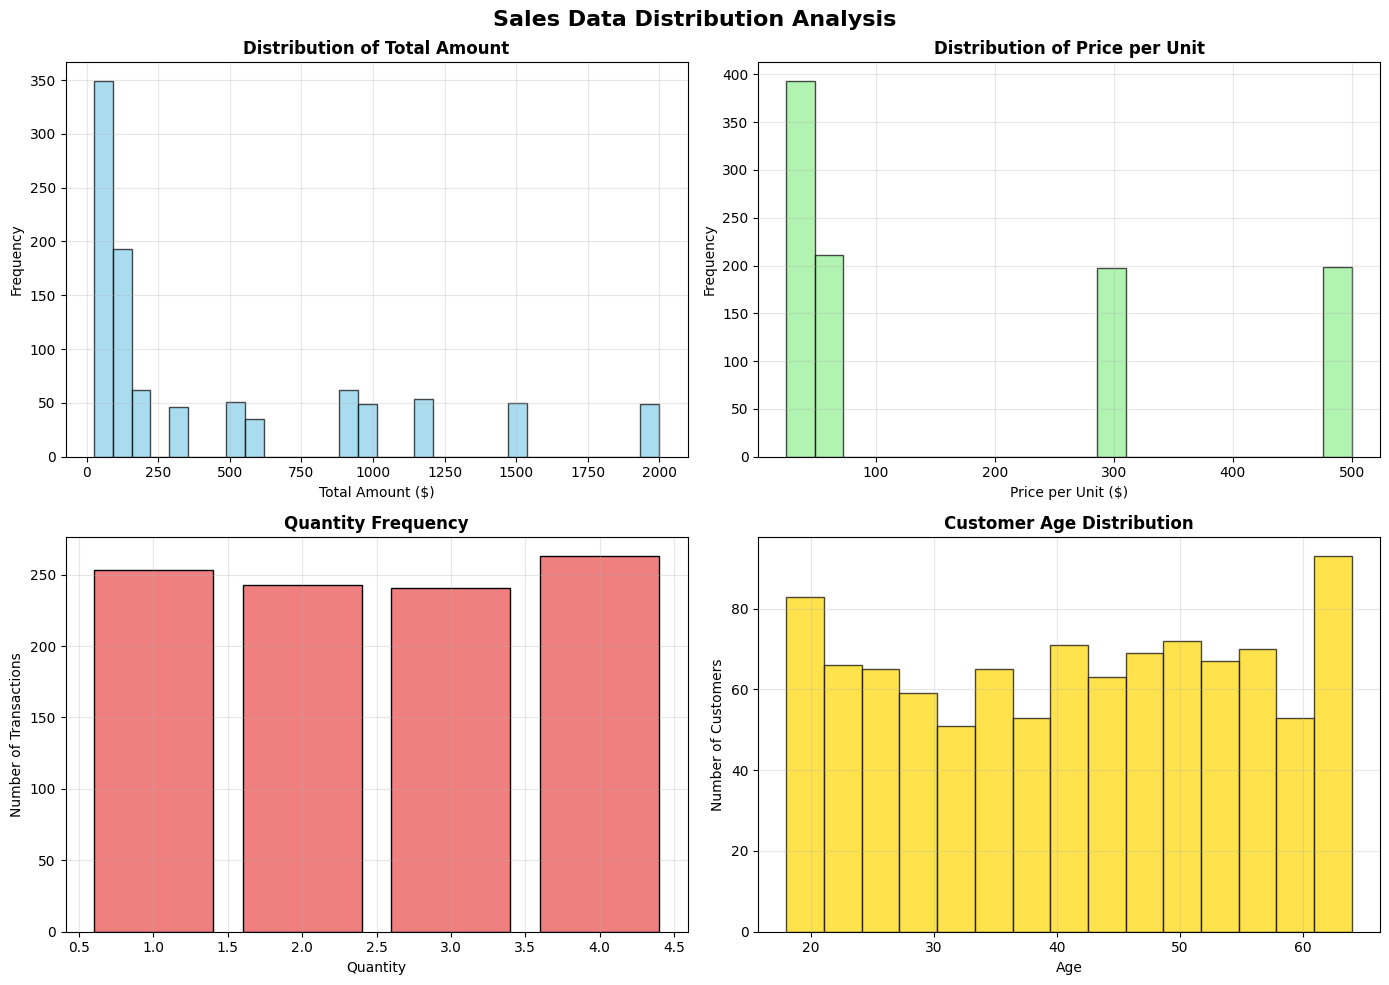

In [10]:
print("\n🎯 STEP 4: SALES DISTRIBUTION VISUALIZATION")
print("="*50)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sales Data Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Total Amount Distribution
axes[0, 0].hist(df_clean['Total Amount'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Total Amount', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Total Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Price per Unit Distribution
axes[0, 1].hist(df_clean['Price per Unit'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Price per Unit', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Price per Unit ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Quantity Distribution
axes[1, 0].bar(df_clean['Quantity'].value_counts().index,
               df_clean['Quantity'].value_counts().values,
               color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Quantity Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Number of Transactions')
axes[1, 0].grid(True, alpha=0.3)

# 4. Age Distribution
axes[1, 1].hist(df_clean['Age'], bins=15, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Customer Age Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🎯 STEP 5: TIME SERIES ANALYSIS
📅 Time Period Covered:
  Start Date: 2023-01-01
  End Date: 2024-01-01
  Total Days: 365
  Number of Months: 12

📊 Monthly Sales Summary:
  Best Month: May ($53,150.00)
  Worst Month: January ($1,530.00)


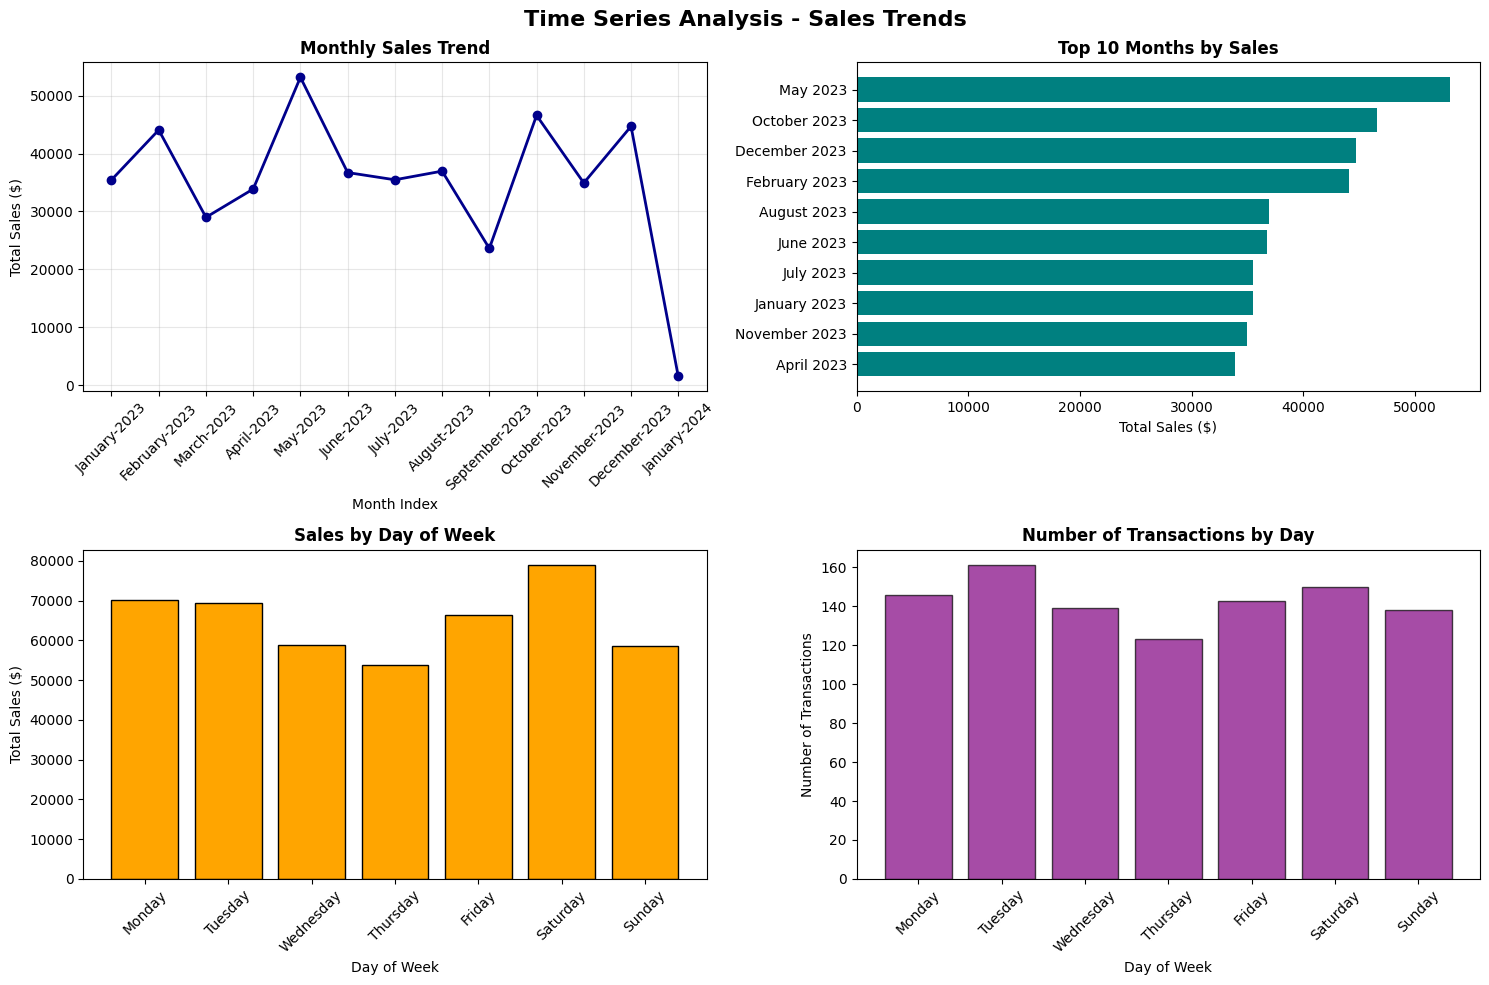

In [11]:
print("\n🎯 STEP 5: TIME SERIES ANALYSIS")
print("="*50)

# Convert Date to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Extract time components
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Month_Name'] = df_clean['Date'].dt.month_name()
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['Weekday'] = df_clean['Date'].dt.day_name()
df_clean['Weekday_Num'] = df_clean['Date'].dt.dayofweek  # Monday=0, Sunday=6

print("📅 Time Period Covered:")
print(f"  Start Date: {df_clean['Date'].min().strftime('%Y-%m-%d')}")
print(f"  End Date: {df_clean['Date'].max().strftime('%Y-%m-%d')}")
print(f"  Total Days: {(df_clean['Date'].max() - df_clean['Date'].min()).days}")
print(f"  Number of Months: {df_clean['Month'].nunique()}")

# Monthly sales trend
monthly_sales = df_clean.groupby(['Year', 'Month', 'Month_Name'])['Total Amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

print(f"\n📊 Monthly Sales Summary:")
print(f"  Best Month: {monthly_sales.loc[monthly_sales['Total Amount'].idxmax(), 'Month_Name']} "
      f"(${monthly_sales['Total Amount'].max():,.2f})")
print(f"  Worst Month: {monthly_sales.loc[monthly_sales['Total Amount'].idxmin(), 'Month_Name']} "
      f"(${monthly_sales['Total Amount'].min():,.2f})")

# Plot monthly trend
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time Series Analysis - Sales Trends', fontsize=16, fontweight='bold')

# 1. Monthly Sales Line Chart
axes[0, 0].plot(range(len(monthly_sales)), monthly_sales['Total Amount'],
                marker='o', linewidth=2, color='darkblue', markersize=6)
axes[0, 0].set_title('Monthly Sales Trend', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month Index')
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(len(monthly_sales)))
axes[0, 0].set_xticklabels([f"{m}-{y}" for m, y in zip(monthly_sales['Month_Name'], monthly_sales['Year'])], rotation=45)

# 2. Monthly Sales Bar Chart (Top 10 months)
top_months = monthly_sales.sort_values('Total Amount', ascending=False).head(10)
axes[0, 1].barh(top_months['Month_Name'] + ' ' + top_months['Year'].astype(str),
                top_months['Total Amount'], color='teal')
axes[0, 1].set_title('Top 10 Months by Sales', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Total Sales ($)')
axes[0, 1].invert_yaxis()  # Highest on top

# 3. Daily Sales Pattern
daily_sales = df_clean.groupby('Weekday')['Total Amount'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(weekday_order)
axes[1, 0].bar(daily_sales.index, daily_sales.values, color='orange', edgecolor='black')
axes[1, 0].set_title('Sales by Day of Week', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Total Sales ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Daily Transactions Count
daily_counts = df_clean.groupby('Weekday').size().reindex(weekday_order)
axes[1, 1].bar(daily_counts.index, daily_counts.values, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Number of Transactions by Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


🎯 STEP 6: CUSTOMER ANALYSIS
👫 GENDER ANALYSIS:
  Male Customers: 490 (49.0%)
  Female Customers: 510 (51.0%)
  Total Sales by Males: $223,160.00
  Total Sales by Females: $232,840.00
  Average Transaction Value - Male: $455.43
  Average Transaction Value - Female: $456.55

👥 AGE GROUP ANALYSIS:
Age Group Statistics:
          Customer ID Total Amount        
                count          sum    mean
Age_Group                                 
Under 20           63        34730  551.27
20-29             210        98215  467.69
30-39             193        95950  497.15
40-49             221        93795  424.41
50-59             220       100085  454.93
60+                93        33225  357.26

🏆 TOP 10 CUSTOMERS BY TOTAL SPENDING:
             Total Spent  Purchase Count
Customer ID                             
CUST015             2000               1
CUST412             2000               1
CUST970             2000               1
CUST547             2000               1
CUST281  

/tmp/ipython-input-3827175532.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_clean.groupby('Age_Group').agg({


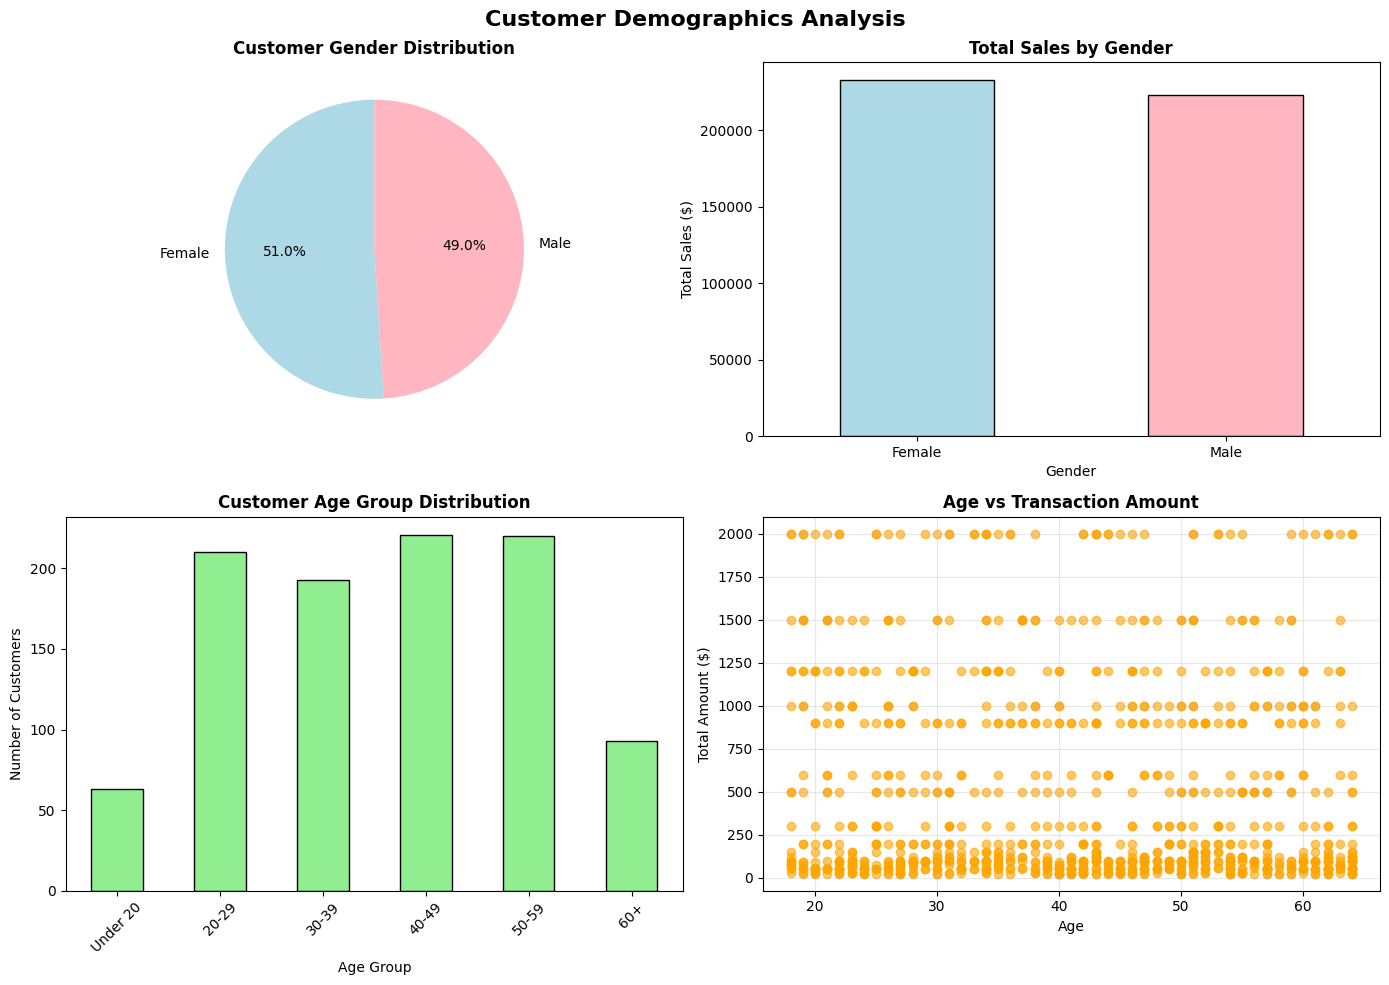

In [12]:
print("\n🎯 STEP 6: CUSTOMER ANALYSIS")
print("="*50)

print("👫 GENDER ANALYSIS:")
gender_counts = df_clean['Gender'].value_counts()
gender_sales = df_clean.groupby('Gender')['Total Amount'].sum()

print(f"  Male Customers: {gender_counts.get('Male', 0)} ({gender_counts.get('Male', 0)/len(df_clean)*100:.1f}%)")
print(f"  Female Customers: {gender_counts.get('Female', 0)} ({gender_counts.get('Female', 0)/len(df_clean)*100:.1f}%)")
print(f"  Total Sales by Males: ${gender_sales.get('Male', 0):,.2f}")
print(f"  Total Sales by Females: ${gender_sales.get('Female', 0):,.2f}")
print(f"  Average Transaction Value - Male: ${df_clean[df_clean['Gender']=='Male']['Total Amount'].mean():,.2f}")
print(f"  Average Transaction Value - Female: ${df_clean[df_clean['Gender']=='Female']['Total Amount'].mean():,.2f}")

print("\n👥 AGE GROUP ANALYSIS:")
# Create age groups
df_clean['Age_Group'] = pd.cut(df_clean['Age'],
                               bins=[0, 20, 30, 40, 50, 60, 100],
                               labels=['Under 20', '20-29', '30-39', '40-49', '50-59', '60+'])

age_group_stats = df_clean.groupby('Age_Group').agg({
    'Customer ID': 'count',
    'Total Amount': ['sum', 'mean']
}).round(2)

print("Age Group Statistics:")
print(age_group_stats)

# Top customers by total spending
top_customers = df_clean.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count'
}).round(2).sort_values('Total Amount', ascending=False).head(10)

print(f"\n🏆 TOP 10 CUSTOMERS BY TOTAL SPENDING:")
print(top_customers.rename(columns={'Transaction ID': 'Purchase Count', 'Total Amount': 'Total Spent'}))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Customer Demographics Analysis', fontsize=16, fontweight='bold')

# 1. Gender Distribution
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'],
                   ax=axes[0, 0], startangle=90)
axes[0, 0].set_title('Customer Gender Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('')

# 2. Gender Sales Contribution
gender_sales.plot(kind='bar', color=['lightblue', 'lightpink'], edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by Gender', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Total Sales ($)')
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Age Group Distribution
age_group_counts = df_clean['Age_Group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='lightgreen', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Customer Age Group Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Age vs Total Amount Scatter
axes[1, 1].scatter(df_clean['Age'], df_clean['Total Amount'], alpha=0.6, color='orange')
axes[1, 1].set_title('Age vs Transaction Amount', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Total Amount ($)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🎯 STEP 7: PRODUCT ANALYSIS
🛍️ PRODUCT CATEGORY ANALYSIS:
Product Category Performance:
                 Transaction ID Total Amount                   Quantity  \
                          count          sum    mean   max min      sum   
Product Category                                                          
Beauty                      307       143515  467.48  2000  25      771   
Clothing                    351       155580  443.25  2000  25      894   
Electronics                 342       156905  458.79  2000  25      849   

                 Price per Unit  
                           mean  
Product Category                 
Beauty                   184.06  
Clothing                 174.29  
Electronics              181.90  

🏆 TOP PERFORMING CATEGORIES:
  1. By Revenue: Electronics ($156,905.00)
  2. By Transaction Count: Clothing (351 transactions)
  3. By Average Transaction: Beauty ($467.48)
  4. By Quantity Sold: Clothing (894 units)


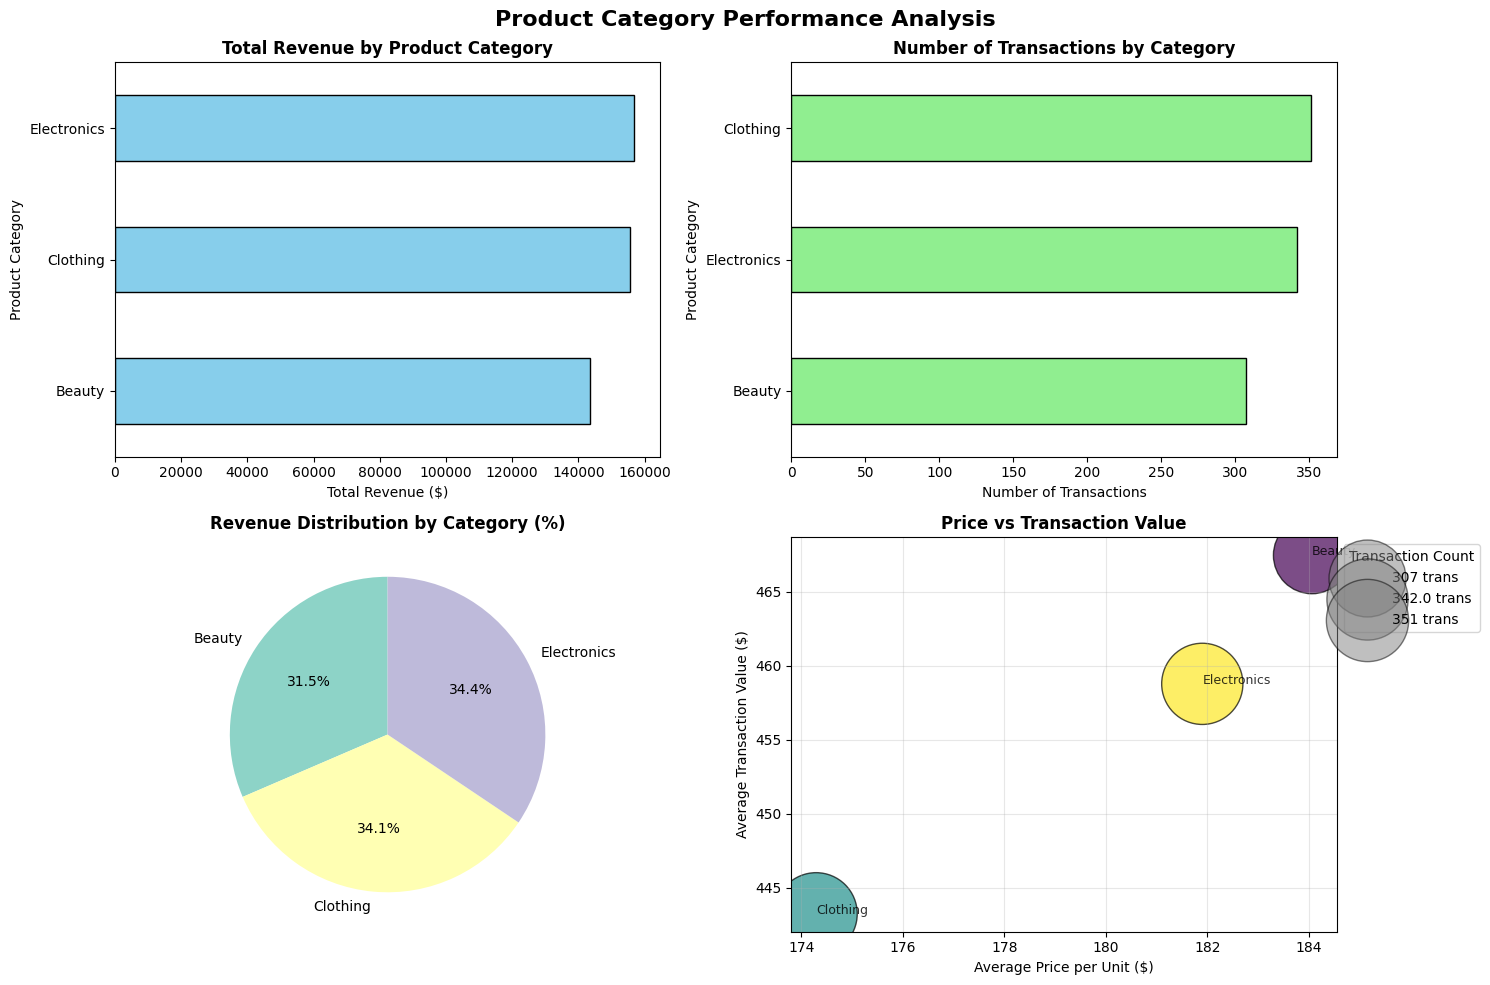

In [13]:
print("\n🎯 STEP 7: PRODUCT ANALYSIS")
print("="*50)

print("🛍️ PRODUCT CATEGORY ANALYSIS:")
category_stats = df_clean.groupby('Product Category').agg({
    'Transaction ID': 'count',
    'Total Amount': ['sum', 'mean', 'max', 'min'],
    'Quantity': 'sum',
    'Price per Unit': 'mean'
}).round(2)

print("Product Category Performance:")
print(category_stats)

# Calculate metrics
category_stats.columns = ['Transaction_Count', 'Total_Revenue', 'Avg_Transaction',
                         'Max_Transaction', 'Min_Transaction', 'Total_Quantity', 'Avg_Price']
category_stats['Revenue_Percentage'] = (category_stats['Total_Revenue'] / category_stats['Total_Revenue'].sum() * 100).round(2)

print(f"\n🏆 TOP PERFORMING CATEGORIES:")
print(f"  1. By Revenue: {category_stats['Total_Revenue'].idxmax()} (${category_stats['Total_Revenue'].max():,.2f})")
print(f"  2. By Transaction Count: {category_stats['Transaction_Count'].idxmax()} ({category_stats['Transaction_Count'].max()} transactions)")
print(f"  3. By Average Transaction: {category_stats['Avg_Transaction'].idxmax()} (${category_stats['Avg_Transaction'].max():,.2f})")
print(f"  4. By Quantity Sold: {category_stats['Total_Quantity'].idxmax()} ({category_stats['Total_Quantity'].max()} units)")

# Product Category Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Product Category Performance Analysis', fontsize=16, fontweight='bold')

# 1. Revenue by Category
category_stats.sort_values('Total_Revenue', ascending=True)['Total_Revenue'].plot(
    kind='barh', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Total Revenue by Product Category', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Total Revenue ($)')

# 2. Transaction Count by Category
category_stats.sort_values('Transaction_Count', ascending=True)['Transaction_Count'].plot(
    kind='barh', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Number of Transactions by Category', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Transactions')

# 3. Revenue Percentage (Pie Chart)
axes[1, 0].pie(category_stats['Revenue_Percentage'],
               labels=category_stats.index,
               autopct='%1.1f%%',
               startangle=90,
               colors=plt.cm.Set3(np.arange(len(category_stats))))
axes[1, 0].set_title('Revenue Distribution by Category (%)', fontsize=12, fontweight='bold')

# 4. Avg Price vs Avg Transaction
scatter = axes[1, 1].scatter(category_stats['Avg_Price'],
                             category_stats['Avg_Transaction'],
                             s=category_stats['Transaction_Count']*10,  # Size by transaction count
                             alpha=0.7,
                             c=range(len(category_stats)),
                             cmap='viridis',
                             edgecolors='black')

# Add labels to points
for i, category in enumerate(category_stats.index):
    axes[1, 1].annotate(category,
                       (category_stats['Avg_Price'].iloc[i], category_stats['Avg_Transaction'].iloc[i]),
                       fontsize=9, alpha=0.8)

axes[1, 1].set_title('Price vs Transaction Value', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Price per Unit ($)')
axes[1, 1].set_ylabel('Average Transaction Value ($)')
axes[1, 1].grid(True, alpha=0.3)

# Add legend for bubble size
sizes = [category_stats['Transaction_Count'].min(),
         category_stats['Transaction_Count'].median(),
         category_stats['Transaction_Count'].max()]

for size in sizes:
    axes[1, 1].scatter([], [], s=size*10, c='gray', alpha=0.5, edgecolors='black',
                      label=f'{size} trans')
axes[1, 1].legend(title='Transaction Count', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


🎯 STEP 8: CORRELATION ANALYSIS & HEATMAP
📊 CORRELATION MATRIX:
                Quantity  Price per Unit  Total Amount    Age
Quantity           1.000           0.018         0.374 -0.024
Price per Unit     0.018           1.000         0.852 -0.038
Total Amount       0.374           0.852         1.000 -0.061
Age               -0.024          -0.038        -0.061  1.000

🔗 KEY CORRELATIONS:
  Quantity vs Total Amount: 0.374
  Price per Unit vs Total Amount: 0.852
  Age vs Total Amount: -0.061
  Quantity vs Price per Unit: 0.018


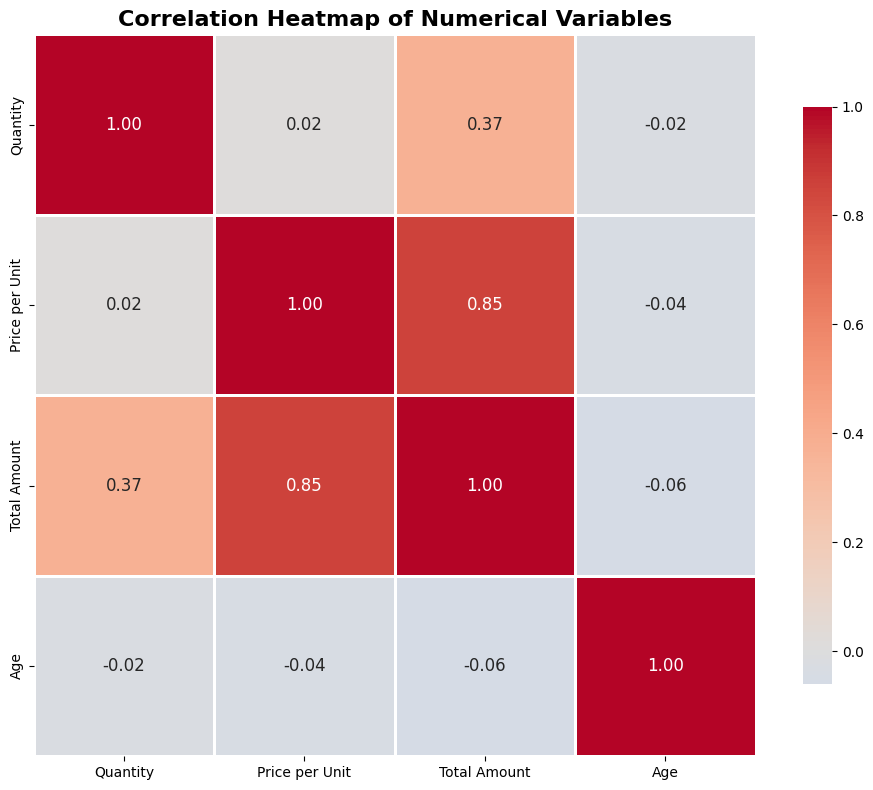


📈 SCATTER MATRIX (Relationships between variables):


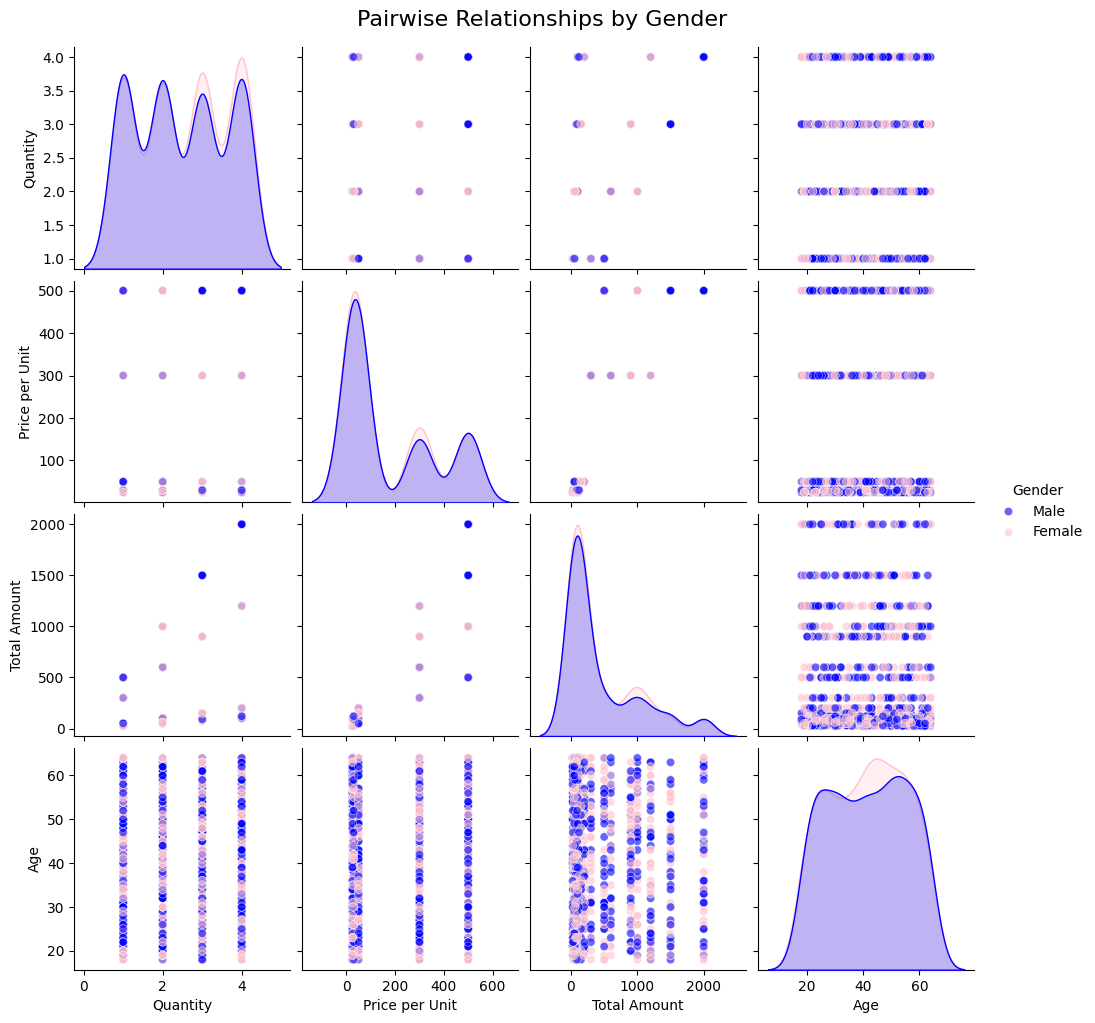

In [14]:
print("\n🎯 STEP 8: CORRELATION ANALYSIS & HEATMAP")
print("="*50)

# Calculate correlation matrix
correlation_matrix = df_clean[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr()

print("📊 CORRELATION MATRIX:")
print(correlation_matrix.round(3))

print("\n🔗 KEY CORRELATIONS:")
print(f"  Quantity vs Total Amount: {correlation_matrix.loc['Quantity', 'Total Amount']:.3f}")
print(f"  Price per Unit vs Total Amount: {correlation_matrix.loc['Price per Unit', 'Total Amount']:.3f}")
print(f"  Age vs Total Amount: {correlation_matrix.loc['Age', 'Total Amount']:.3f}")
print(f"  Quantity vs Price per Unit: {correlation_matrix.loc['Quantity', 'Price per Unit']:.3f}")

# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            fmt='.2f',
            annot_kws={'size': 12})

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Scatter plot matrix for deeper insights
print("\n📈 SCATTER MATRIX (Relationships between variables):")
sns.pairplot(df_clean[['Quantity', 'Price per Unit', 'Total Amount', 'Age', 'Gender']],
             hue='Gender',
             palette={'Male': 'blue', 'Female': 'pink'},
             height=2.5,
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships by Gender', fontsize=16, y=1.02)
plt.show()

In [15]:
print("\n🎯 STEP 9: KEY INSIGHTS & ACTIONABLE RECOMMENDATIONS")
print("="*60)

print("\n🔍 KEY FINDINGS FROM EDA:")
print("1️⃣ REVENUE INSIGHTS:")
print(f"   • Total Revenue Generated: ${df_clean['Total Amount'].sum():,.2f}")
print(f"   • Average Transaction Value: ${df_clean['Total Amount'].mean():,.2f}")
print(f"   • Best Performing Month: {monthly_sales.loc[monthly_sales['Total Amount'].idxmax(), 'Month_Name']}")

print("\n2️⃣ CUSTOMER INSIGHTS:")
print(f"   • Total Unique Customers: {df_clean['Customer ID'].nunique()}")
print(f"   • Gender Split: {gender_counts.get('Male', 0)} Male ({gender_counts.get('Male', 0)/len(df_clean)*100:.1f}%), "
      f"{gender_counts.get('Female', 0)} Female ({gender_counts.get('Female', 0)/len(df_clean)*100:.1f}%)")
print(f"   • Average Customer Age: {df_clean['Age'].mean():.1f} years")

print("\n3️⃣ PRODUCT INSIGHTS:")
best_category = category_stats['Total_Revenue'].idxmax()
print(f"   • Top Product Category: {best_category} (${category_stats.loc[best_category, 'Total_Revenue']:,.2f})")
print(f"   • Most Popular Category (by transactions): {category_stats['Transaction_Count'].idxmax()}")

print("\n4️⃣ TIME-BASED INSIGHTS:")
print(f"   • Peak Sales Day: {daily_sales.idxmax()} (${daily_sales.max():,.2f})")
print(f"   • Average Daily Revenue: ${df_clean['Total Amount'].sum()/df_clean['Date'].nunique():,.2f}")

print("\n🎯 ACTIONABLE RECOMMENDATIONS:")
print("1. 📈 FOCUS ON HIGH-VALUE CATEGORIES:")
print(f"   • Increase marketing for '{best_category}' category which generates maximum revenue")
print(f"   • Consider bundling products or creating promotions for this category")

print("\n2. 👥 TARGET KEY CUSTOMER SEGMENTS:")
print(f"   • Focus on {gender_counts.idxmax()} customers who make up {gender_counts.max()/len(df_clean)*100:.1f}% of transactions")
print(f"   • Create age-specific promotions for the {df_clean['Age_Group'].mode()[0]} age group")

print("\n3. ⏰ OPTIMIZE TIMING:")
print(f"   • Increase staffing/inventory on {daily_sales.idxmax()} (peak sales day)")
print(f"   • Plan major promotions in {monthly_sales.loc[monthly_sales['Total Amount'].idxmax(), 'Month_Name']} (best month)")

print("\n4. 💰 PRICING STRATEGY:")
print(f"   • Review pricing for categories with low transaction counts but high average values")
print(f"   • Consider quantity discounts to increase average transaction size (currently ${df_clean['Total Amount'].mean():.2f})")

print("\n5. 🔄 IMPROVE CUSTOMER RETENTION:")
print(f"   • Implement loyalty program for top {len(top_customers)} customers who contribute significantly")
print(f"   • Personalize recommendations based on customer's previous purchases")

print("\n" + "="*60)
print("✅ EDA COMPLETED SUCCESSFULLY!")
print("="*60)

# Save cleaned data
df_clean.to_csv('retail_sales_cleaned_analysis.csv', index=False)
print(f"\n💾 Cleaned dataset saved as 'retail_sales_cleaned_analysis.csv'")


🎯 STEP 9: KEY INSIGHTS & ACTIONABLE RECOMMENDATIONS

🔍 KEY FINDINGS FROM EDA:
1️⃣ REVENUE INSIGHTS:
   • Total Revenue Generated: $456,000.00
   • Average Transaction Value: $456.00
   • Best Performing Month: May

2️⃣ CUSTOMER INSIGHTS:
   • Total Unique Customers: 1000
   • Gender Split: 490 Male (49.0%), 510 Female (51.0%)
   • Average Customer Age: 41.4 years

3️⃣ PRODUCT INSIGHTS:
   • Top Product Category: Electronics ($156,905.00)
   • Most Popular Category (by transactions): Clothing

4️⃣ TIME-BASED INSIGHTS:
   • Peak Sales Day: Saturday ($78,815.00)
   • Average Daily Revenue: $1,321.74

🎯 ACTIONABLE RECOMMENDATIONS:
1. 📈 FOCUS ON HIGH-VALUE CATEGORIES:
   • Increase marketing for 'Electronics' category which generates maximum revenue
   • Consider bundling products or creating promotions for this category

2. 👥 TARGET KEY CUSTOMER SEGMENTS:
   • Focus on Female customers who make up 51.0% of transactions
   • Create age-specific promotions for the 40-49 age group

3. ⏰ OPTI